In [1]:
%reload_ext autoreload
%autoreload 2

import io
import os

import requests
from dotenv import load_dotenv
from PIL import Image

from src.database import DICdb
from src.visualization import visualize_dic_dataframe

load_dotenv()

DB_HOST = os.environ.get("DB_HOST", "150.145.51.193")
DB_PORT = os.environ.get("DB_PORT", "5432")
DB_NAME = os.environ.get("DB_NAME", "planpincieux")
DB_USER = os.environ.get("DB_USER", "")
DB_PASSWORD = os.environ.get("DB_PASSWORD", "")

APP_HOST = "150.145.51.193"
APP_PORT = 8001
IMG_GET_API_BASEURL = f"http://{DB_HOST}:{APP_PORT}/pics/image/"

db = DICdb(
    host=DB_HOST, port=DB_PORT, database=DB_NAME, user=DB_USER, password=DB_PASSWORD
)

In [3]:
db.get_table_info("glacier_monitoring_app_dicanalysis")

column_name                 data_type is_nullable column_default
0                      id                    bigint          NO           None
1        master_timestamp  timestamp with time zone         YES           None
2         slave_timestamp  timestamp with time zone         YES           None
3           software_used         character varying         YES           None
4        software_version         character varying         YES           None
5   processing_parameters                     jsonb         YES           None
6   time_difference_hours          double precision         YES           None
7                   notes                      text         YES           None
8         master_image_id                    bigint          NO           None
9          slave_image_id                    bigint          NO           None
10         reference_date                      date         YES           None

In [4]:
db.get_analysis_summary()

analysis_date  num_points  avg_magnitude  max_magnitude  min_magnitude  \
0    2024-08-22       32214       0.624183       3.181525   3.588783e-16   
1    2024-08-23       64428       0.528861       2.767483   2.943923e-16   
2    2024-08-25       37583       0.662866       3.170757   2.512148e-15   
3    2024-08-26      134225       0.558396       2.850351   5.024296e-16   
4    2024-08-27        5369       1.139305       3.917474   1.000000e-02   
5    2024-08-29       53690       0.618682       2.745906   2.512148e-15   
6    2024-08-30       69797       0.584430       2.592007   2.512148e-15   

   std_magnitude  
0       0.617389  
1       0.530443  
2       0.623676  
3       0.591773  
4       0.669636  
5       0.614151  
6       0.533925

In [5]:
target_date = "2024-08-23"
df = db.get_dic_data(target_date=target_date)
df

analysis_id  master_image_id          master_timestamp  slave_image_id  \
0             3077            60168 2024-08-23 15:00:13+00:00           60268   
1             3079            60166 2024-08-23 13:00:15+00:00           60266   
2             3054            60168 2024-08-23 15:00:13+00:00           60255   
3             3056            60166 2024-08-23 13:00:15+00:00           60253   
4             3055            60167 2024-08-23 14:00:13+00:00           60254   
...            ...              ...                       ...             ...   
64423         3085            60167 2024-08-23 14:00:13+00:00           60189   
64424         3096            60166 2024-08-23 13:00:15+00:00           60214   
64425         3098            60167 2024-08-23 14:00:13+00:00           60228   
64426         3083            60168 2024-08-23 15:00:13+00:00           60177   
64427         3095            60167 2024-08-23 14:00:13+00:00           60215   

                slave_timestamp  time_difference_hours  seed_x_px  seed_y_px  \
0     2024-08-31 15:00:14+00:00             192.000278        128        128   
1     2024-08-31 13:00:14+00:00             191.999722        128        128   
2     2024-08-30 15:00:13+00:00             168.000000        128        128   
3     2024-08-30 13:00:13+00:00             167.999444        128        128   
4     2024-08-30 14:00:14+00:00             168.000278        128        128   
...                         ...                    ...        ...        ...   
64423 2024-08-25 14:00:14+00:00              48.000278       5888       3840   
64424 2024-08-27 13:00:13+00:00              95.999444       5888       3840   
64425 2024-08-28 14:00:13+00:00             120.000000       5888       3840   
64426 2024-08-24 15:00:14+00:00              24.000278       5888       3840   
64427 2024-08-27 14:00:13+00:00              96.000000       5888       3840   

       displacement_x_px  displacement_y_px  displacement_magnitude_px  
0              -0.045625          -0.110000                   0.119087  
1              -0.045625          -0.110000                   0.119087  
2              -0.034286          -0.047857                   0.058871  
3              -0.034286          -0.047857                   0.058871  
4              -0.034286          -0.047857                   0.058871  
...                  ...                ...                        ...  
64423          -0.120000          -0.312500                   0.334748  
64424           0.066250          -0.250000                   0.258629  
64425          -0.030000          -0.132000                   0.135366  
64426          -0.640000          -0.050000                   0.641950  
64427           0.066250          -0.250000                   0.258629  

[64428 rows x 11 columns]

In [6]:
master_image_id = df["master_image_id"].iloc[0]
response = requests.get(IMG_GET_API_BASEURL + f"{master_image_id}/")
background_image = Image.open(io.BytesIO(response.content))

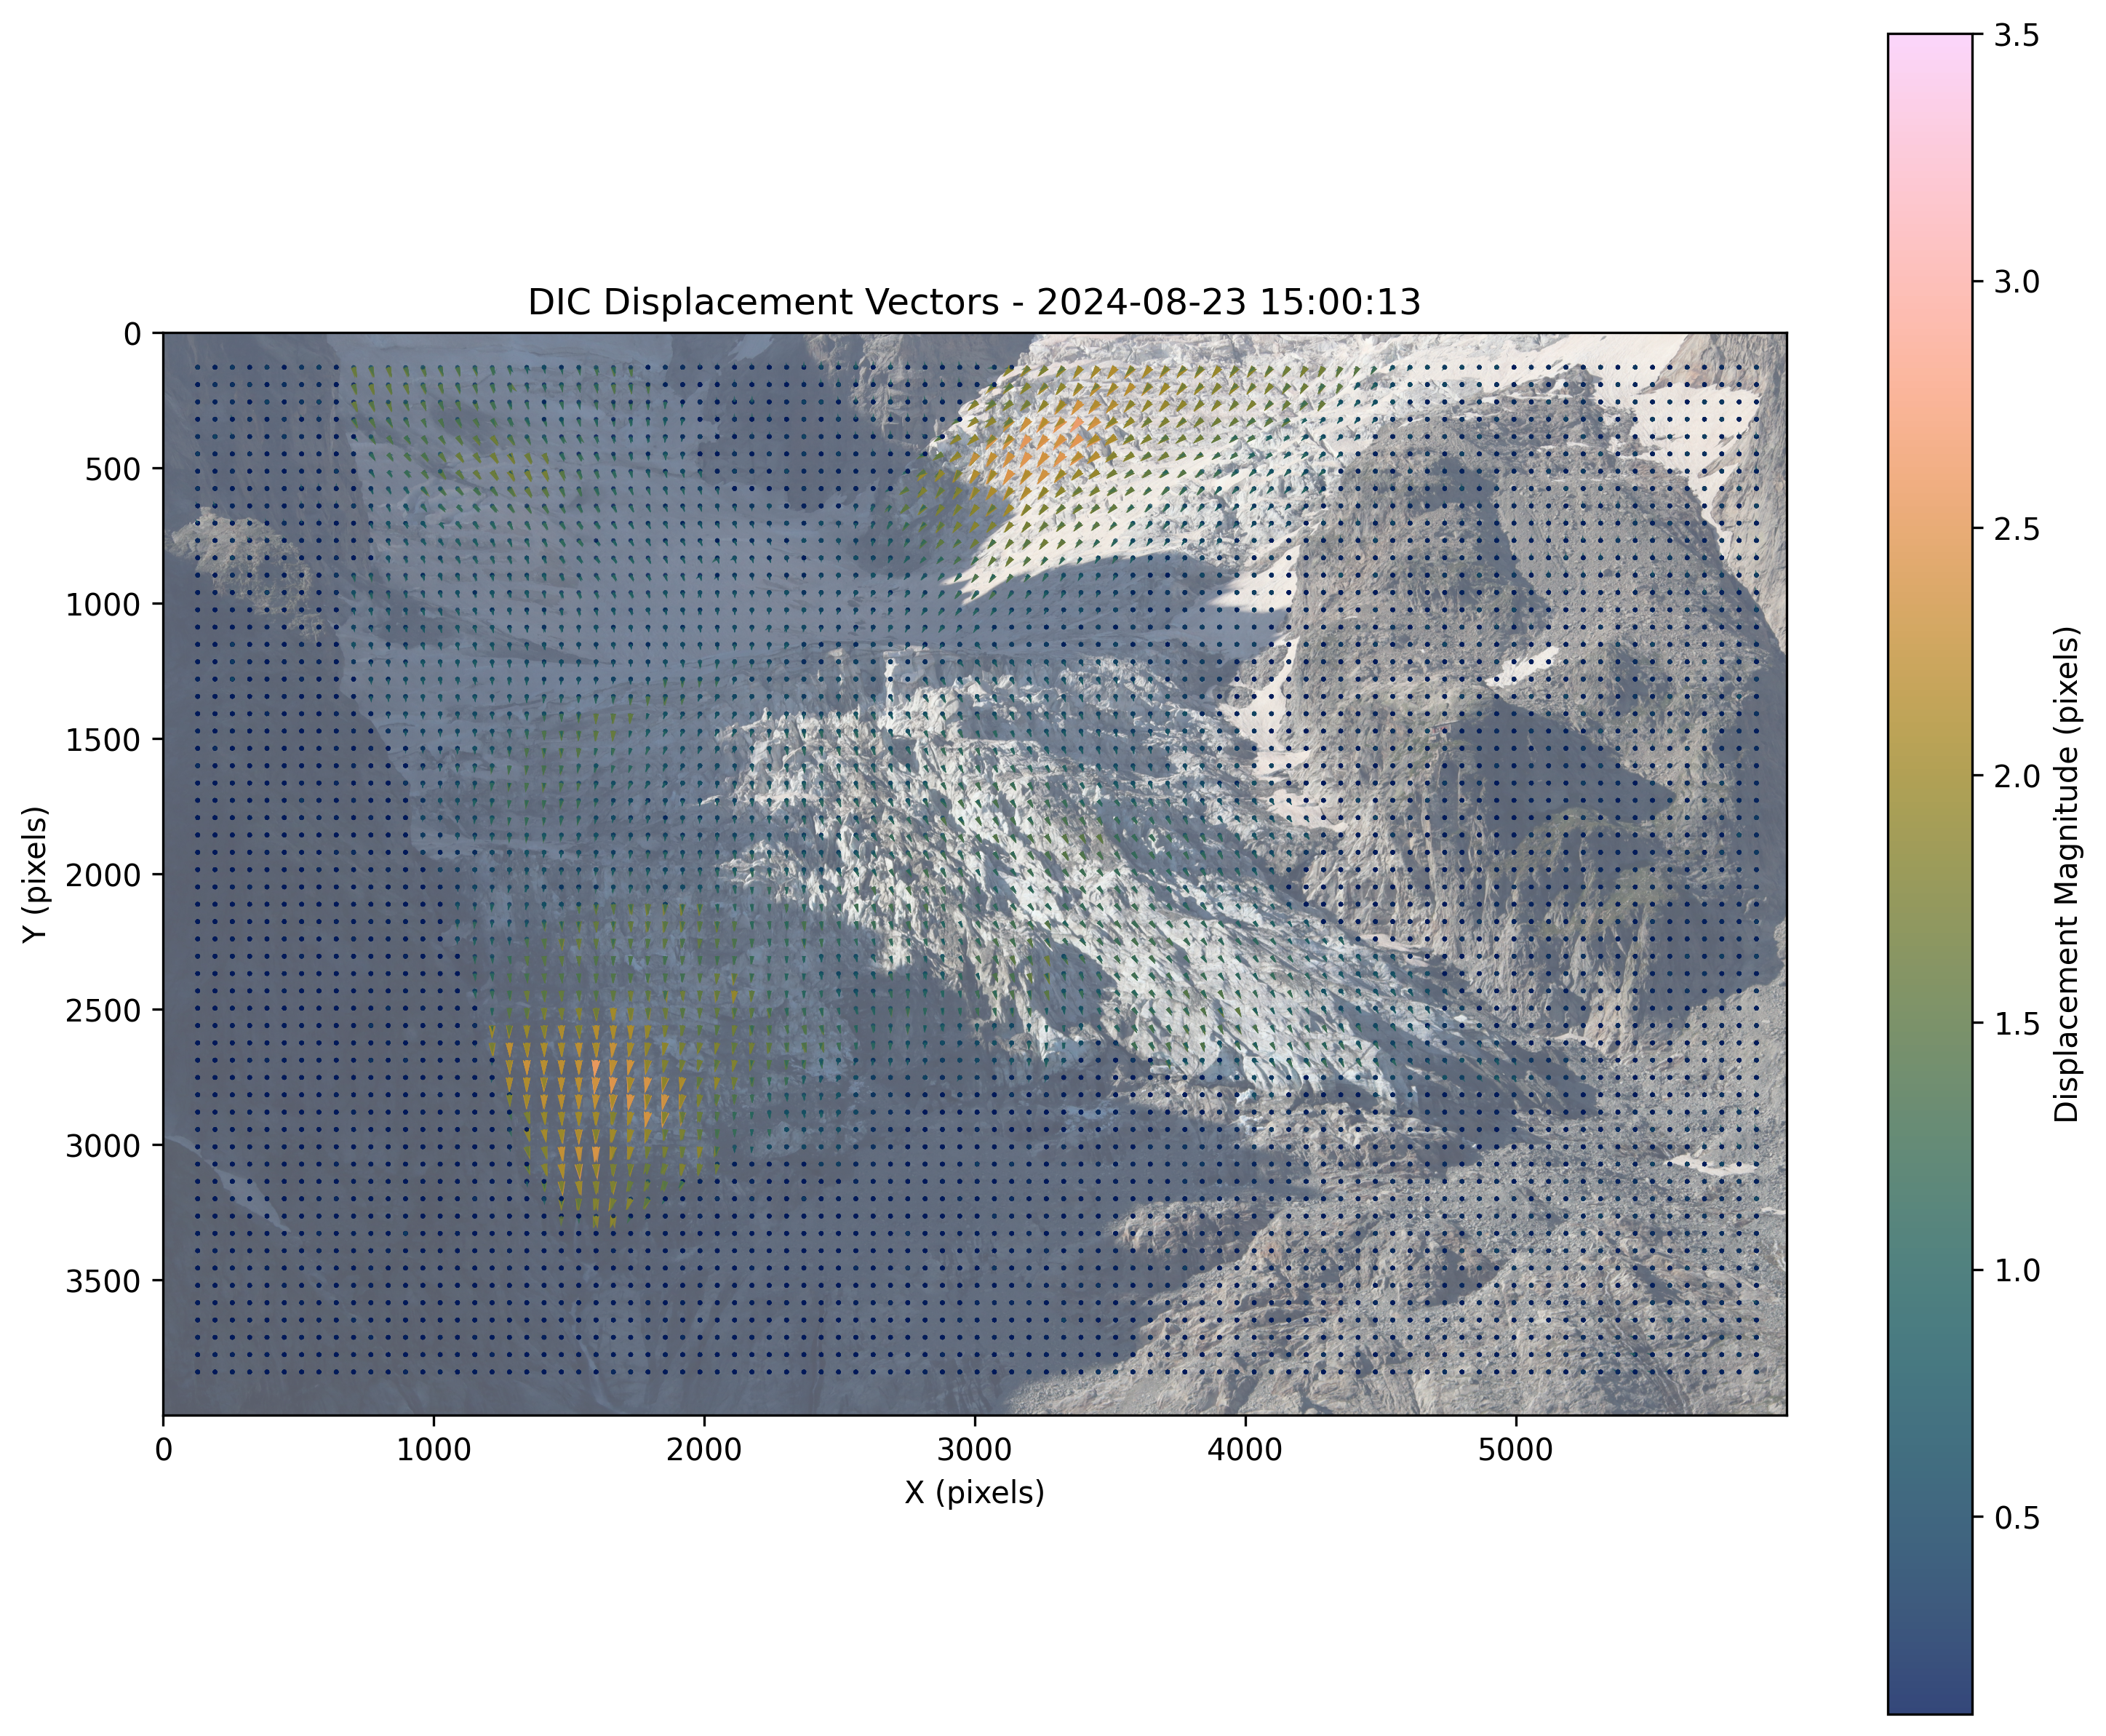

In [ ]:
visualize_dic_dataframe(
    df,
    background_image=background_image,
    cmap_name="batlow",
    vmin=0.1,
    vmax=3.5,
    show=True,
)